## Import libraries

In [32]:
!pip install xgboost

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer



## Data Collection & Analysis

### Load data

In [34]:
bigMartDF=pd.read_csv('C:/Users/UCHENNA/Documents/ML/Big Mart Sales/train.csv')
bigMartDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Number of data points & features

In [35]:
bigMartDF.shape

(8523, 12)

### getting information about the dataset


In [36]:
bigMartDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Checking for missing values

In [37]:
bigMartDF.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### handling missing values

In [38]:
#mean-->average value
#mode-->most repeated value
# Initialize the imputers, by setting what values we want to impute and the strategy to use
bigMartDF['Item_Weight']=bigMartDF['Item_Weight'].fillna(int(bigMartDF['Item_Weight'].mean()))

bigMartDF['Outlet_Size'] = bigMartDF['Outlet_Size'].fillna(bigMartDF['Outlet_Size'].mode()[0])

bigMartDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
bigMartDF.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

### Statistical measure about the data

In [40]:
bigMartDF.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.066132,140.992782,1997.831867,2181.288914
std,4.238481,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Numerical feature

In [41]:
sns.set()

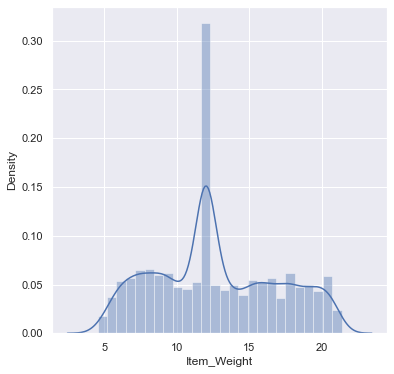

In [42]:
# item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(bigMartDF['Item_Weight'])
plt.show()

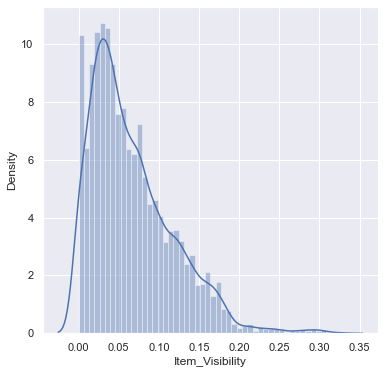

In [43]:
# item visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(bigMartDF['Item_Visibility'])
plt.show()

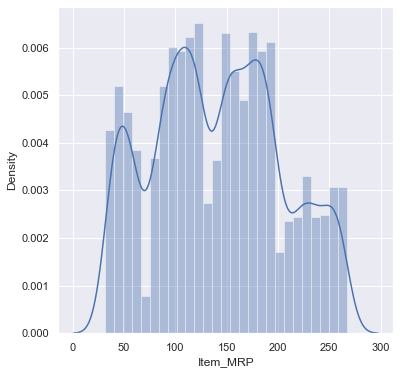

In [44]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(bigMartDF['Item_MRP'])
plt.show()

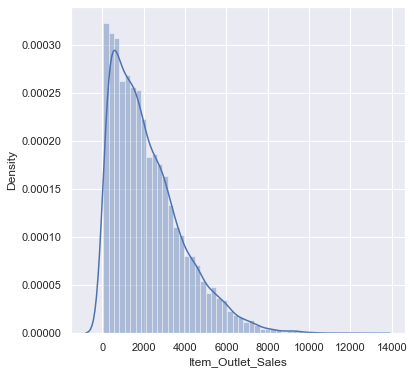

In [45]:
# Item_Outlet_Sales  distribution
plt.figure(figsize=(6,6))
sns.distplot(bigMartDF['Item_Outlet_Sales'])
plt.show()

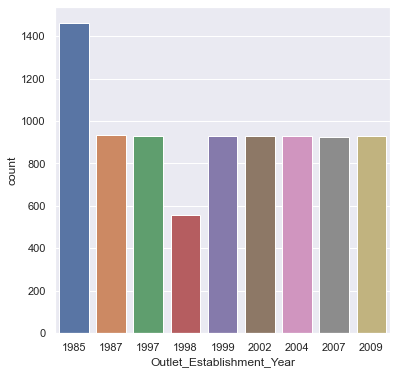

In [46]:
# count plot on single numerical variable
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Establishment_Year', data =bigMartDF)
 
# Show the plot
plt.show()

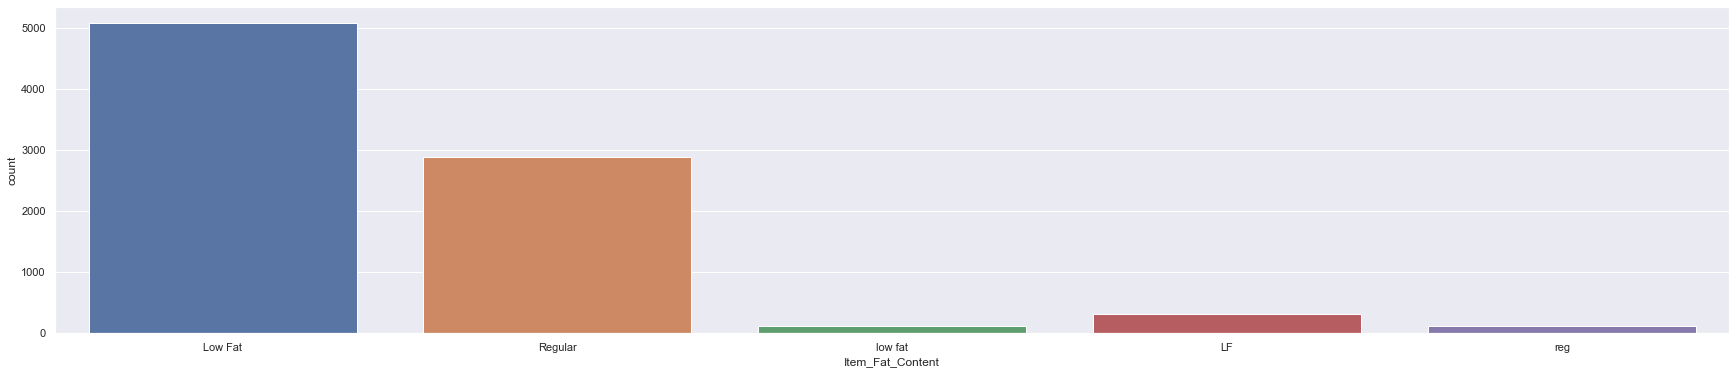

In [47]:
# count plot on single categorical variable
plt.figure(figsize=(30,6))
sns.countplot(x ='Item_Fat_Content', data =bigMartDF)
 
# Show the plot
plt.show()

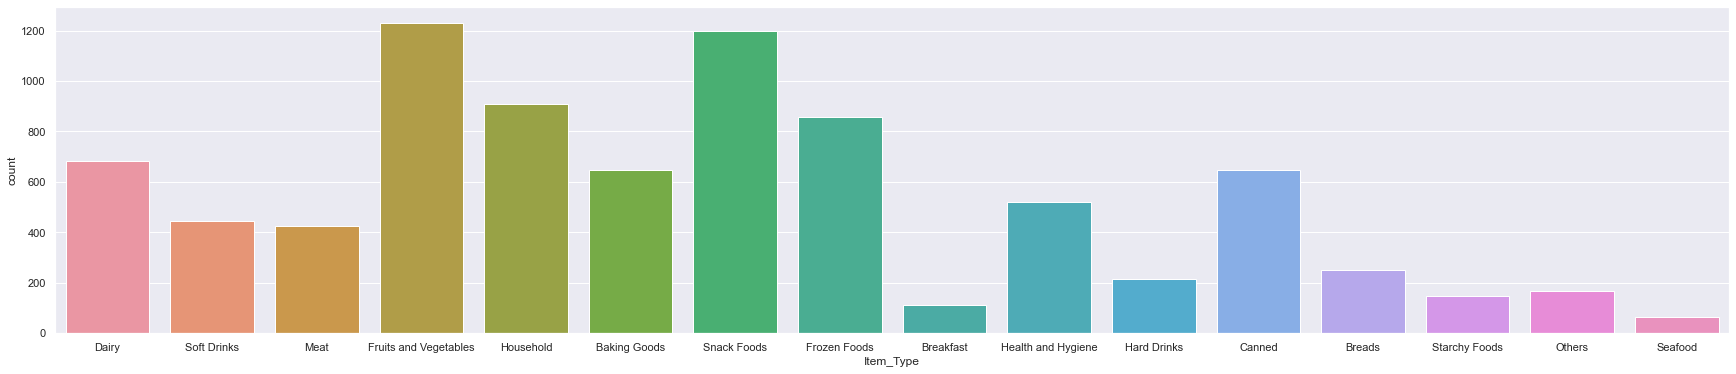

In [48]:
# count plot on single categorical variable
plt.figure(figsize=(30,6))
sns.countplot(x ='Item_Type', data =bigMartDF)
 
# Show the plot
plt.show()

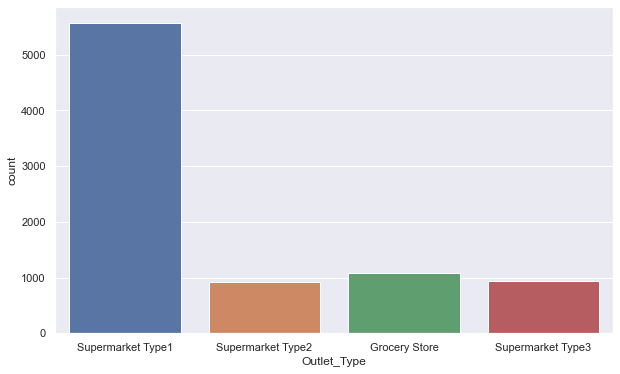

In [49]:
# count plot on single categorical variable
plt.figure(figsize=(10,6))
sns.countplot(x ='Outlet_Type', data =bigMartDF)
 
# Show the plot
plt.show()

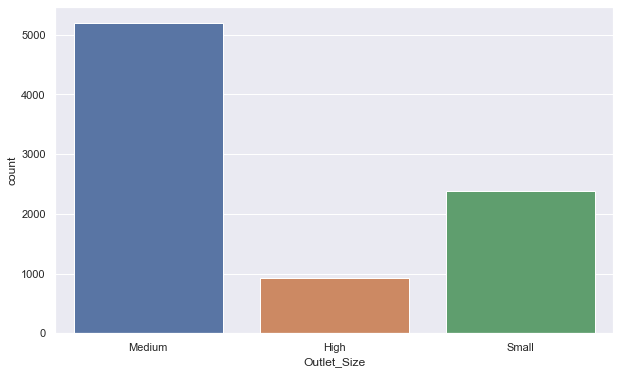

In [50]:
# count plot on single categorical variable
plt.figure(figsize=(10,6))
sns.countplot(x ='Outlet_Size', data =bigMartDF)
 
# Show the plot
plt.show()

## Data Preprocessing

In [51]:
#viewing data
bigMartDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
# value count
bigMartDF['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [53]:
bigMartDF.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [54]:
bigMartDF['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [55]:
encoder=LabelEncoder()

In [56]:
bigMartDF['Item_Identifier']=encoder.fit_transform(bigMartDF['Item_Identifier'])
bigMartDF['Item_Fat_Content']=encoder.fit_transform(bigMartDF['Item_Fat_Content'])
bigMartDF['Item_Type']=encoder.fit_transform(bigMartDF['Item_Type'])
bigMartDF['Outlet_Identifier']=encoder.fit_transform(bigMartDF['Outlet_Identifier'])
bigMartDF['Outlet_Size']=encoder.fit_transform(bigMartDF['Outlet_Size'])
bigMartDF['Outlet_Location_Type']=encoder.fit_transform(bigMartDF['Outlet_Location_Type'])
bigMartDF['Outlet_Type']=encoder.fit_transform(bigMartDF['Outlet_Type'])


In [57]:
bigMartDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [58]:
# dropping last column
bigMartDF = bigMartDF.iloc[:,:-1]

In [59]:
bigMartDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [60]:
## Splitiing features and target
X = bigMartDF.drop(bigMartDF.columns[11],axis=1)
Y=bigMartDF['Item_Outlet_Sales']

IndexError: index 11 is out of bounds for axis 0 with size 11

In [ ]:
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [ ]:
# getting shape of dataset, train, test for input features
print(X.shape,X_train.shape,X_test.shape)

## Machine Learning Training

### XGBoost  Regressor Algorithm

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

### Evaluation

In [ ]:
# Prediction on training data
training_data_prediction=regressor.predict(X_train)

In [ ]:
#R Squared values
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print("R squared value:",r2_train)

In [ ]:
# Prediction on testing data
testing_data_prediction=regressor.predict(X_test)

In [ ]:
r2_test=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared value:",r2_test)